In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Crop_recommendation.csv')

# View basic info
print(df.shape)
print(df.columns)
print(df.head())

(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


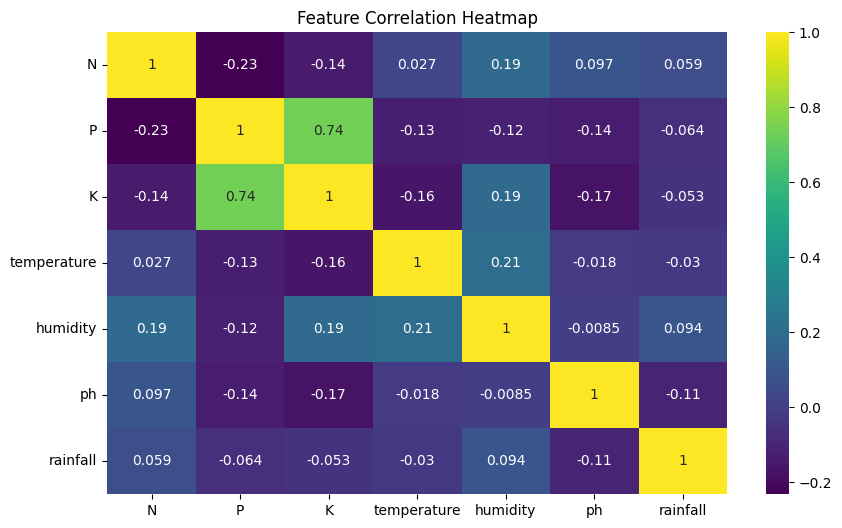

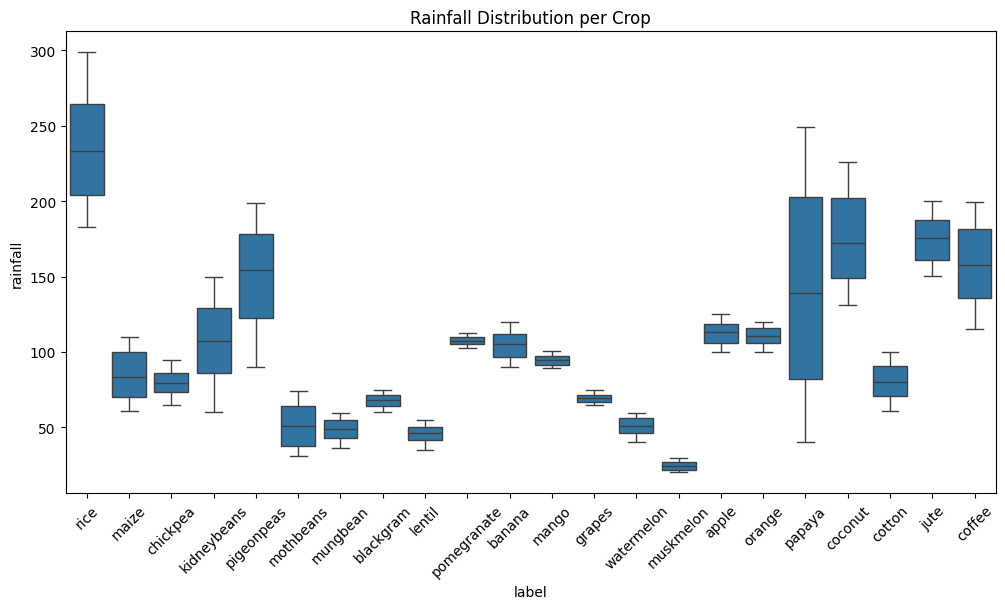

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to see which features relate to crop type
plt.figure(figsize=(10, 6))
# Drop the non-numeric 'label' column before calculating correlation
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

# Boxplot of rainfall by crop type
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=45)
plt.title('Rainfall Distribution per Crop')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split features and labels
X = df.drop('label', axis=1)  # Features (e.g., rainfall, pH, etc.)
y = df['label']               # Target variable (crop type)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9818181818181818

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93    

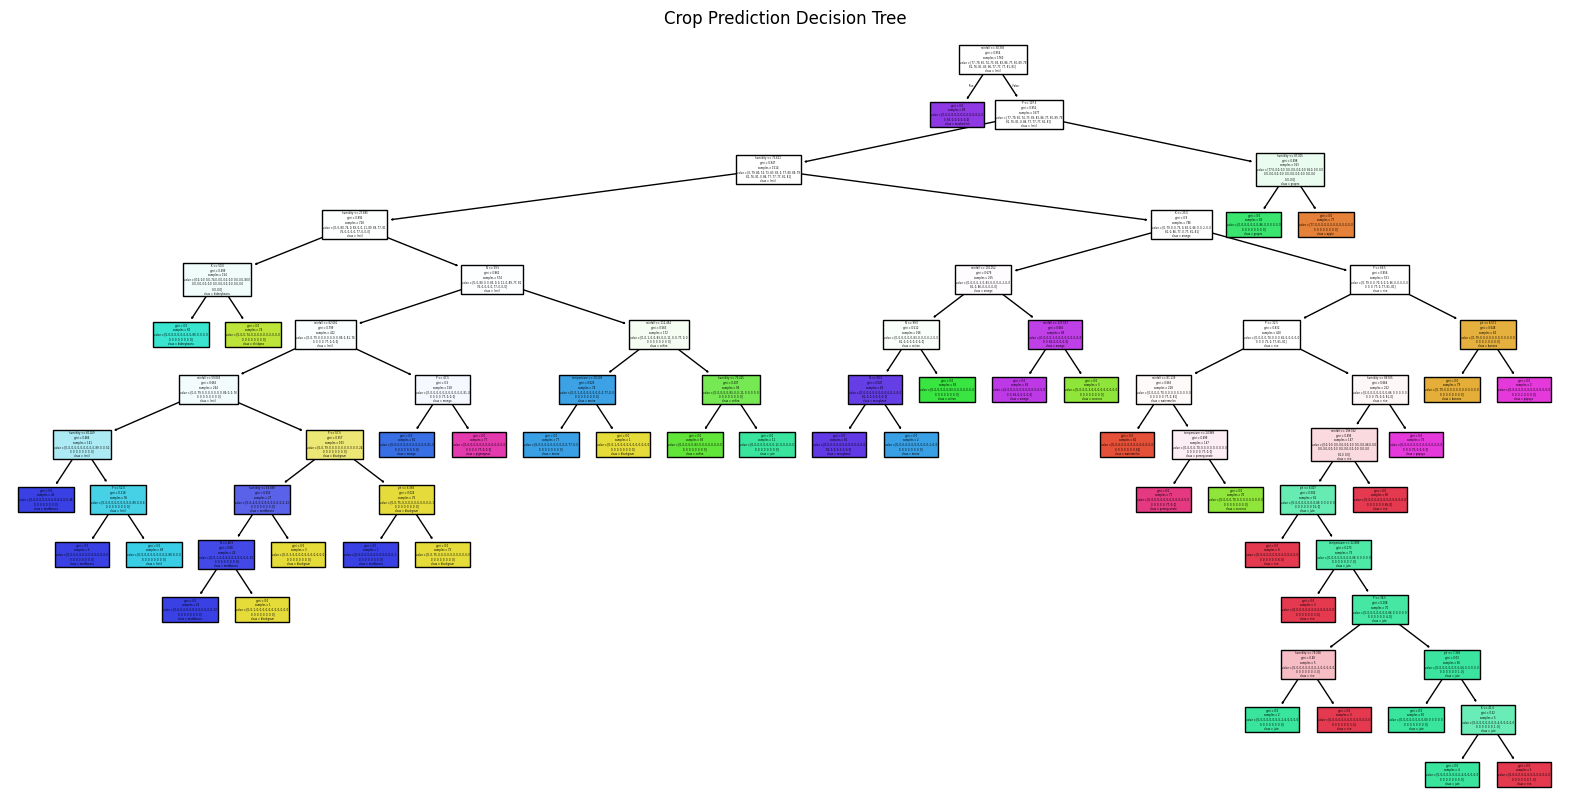

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)

plt.title("Crop Prediction Decision Tree")
plt.show()


In [ ]:
plt.savefig("crop_tree_visualization.png", dpi=300)

<Figure size 640x480 with 0 Axes>

The decision tree begins with [feature], indicating it’s the strongest predictor of crop suitability. As we move down the tree, [feature] and [feature] refine the classification further. For example, when [condition], the model predicts [crop], aligning with agricultural best practices in similar environments.


In [ ]:
import joblib

# Save the model
joblib.dump(model, "crop_prediction_model.pkl")

# Load it later
loaded_model = joblib.load("crop_prediction_model.pkl")


This project applies machine learning to improve crop selection decisions in Kenya, supporting SDG 2 (Zero Hunger). Using rainfall, temperature, soil pH, and nutrient levels, the system predicts optimal crops, helping farmers increase yield and sustainability.

- Data Cleaning & Exploration
- Model Training with Decision Tree
- Visualization of Decision Paths
- Performance Evaluation (accuracy, precision, recall)
- Insight Extraction & Model Export

The model revealed rainfall and potassium levels as the strongest predictors. For regions with high rainfall and balanced pH, crops like rice were recommended, while lower moisture favored maize or millet. This aligns with agricultural practices in semi-arid zones.
